# Final Project

## Course : Applied Deep Learning

Name - Adithya Sabarish Saravanan \
Matriculation number- 32979 \
Submitted To- Prof. Schutera \
Submission Date - 30-June-2021 


### Topic: Transfer Learning for multiple class classification

# Abstract:

As from slides and assignment of the lecture [TL], it is evident that Tranfer learning takes less time for training when compared to training the full network. The main reason for that was,the number of trainable parameters were less in case of transfer learning. Even the classification accuracy using tranfer learning was acceptable as well. 

The objective of this project is 

- to analyse the performance of transfer learning for classifying multiple classes.
- using the results discuss the advantages and drawbacks of using transfer learning algorithm for multi-class classification problem. 




# Introduction:


The insect species are facing several problems today. Appropriate measures are required to save them. To implement some kind of aid for saving the insects, especially bees, it is important to properly identify the situation and the condition of the insect. Among various insects, Bees play an important role as they help in maintaing the food chain and thus help in environment sustainability. This project explores the usage of transfer learning concept for identifying the status of a Bee and there by also talks about the pro and contras of Transfer Learning.

A dataset [Bee_data], is chosen that contains various images that correspond to different states of Bees. Using this data set, the idea is to train a neural network using transfer learning and deploy it for classification. Additionally the capability of transfer learning to classify newly learnt classes is analysed. 


__Thus this project tends to answer thew question - Transfer learning is a good option with considerable accuracy and requires very less time for training. But can transfer learning also be advantageous when we train the neural network on multiple classes?__

The project is subdivided as follows:
- Dataset and data preprocessing for transfer learning
- Training and validation generators
- Setting up the base model and additional layers
- Training 
- Test data pipeline setup and Testing
- Results and Discussion

# Section 1 - Dataset and data preprocessing for transfer learning

The data set [Bee_data] consists of Bee images that talk about the current state of bees (6 classes) namely - 'ant problems','few varrao, hive beetles','healthy','hive being robbed','missing queen','Varroa, Small Hive Beetles' 

### Datasplit:

Total number of images in the dataset = 5173

Number of classes = 6

Also the dataset is divided to training, validation and test data. Due to the number of available images in each of the class 10% of total images in each class is chosen as validation data and 5% of total images in each class is chosen as test data.



### Import the data set


In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os

import tensorflow as tf
from tensorflow import keras

import imageio
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg




df = pd.read_csv('/home/adisaba/Documents/Master_Mechatronics/ADL/final_proj/data/bee_data.csv', sep=',')


### Seperate the data to 6 folders corresponding to 6 classes :

In [2]:
files = df['file']

for index, class_name in enumerate(df['health']):
    file_original_path = '/home/adisaba/Documents/Master_Mechatronics/ADL/final_proj/data/bee_imgs/bee_imgs/' + (files[index])
    img = cv2.imread(file_original_path)
    file_new_path = '/home/adisaba/Documents/Master_Mechatronics/ADL/final_proj/data/bee_imgs/' + class_name + '/'
    cv2.imwrite(file_new_path+ (files[index]), img)



# Section 2 - Training and validation generators

### Datasplit for training, testing:

In [3]:
base_dir = '/home/adisaba/Documents/Master_Mechatronics/ADL/final_proj/data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')


In [4]:
image_size = 200 # All images will be resized to 200x200
batch_size = 20

# Rescale all images by 1./255 and apply image augmentation
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
                train_dir,  
                target_size=(image_size, image_size),
                batch_size=batch_size,
                classes = ['ant problems','few varrao, hive beetles','healthy','hive being robbed','missing queen','Varroa, Small Hive Beetles']
                )


validation_generator = validation_datagen.flow_from_directory(
                validation_dir, 
                target_size=(image_size, image_size),
                batch_size=batch_size,
                classes = ['ant problems','few varrao, hive beetles','healthy','hive being robbed','missing queen','Varroa, Small Hive Beetles']
                
                )

Found 4400 images belonging to 6 classes.
Found 523 images belonging to 6 classes.


## Sample data of 3 of the 6 classes

### Ant problems:

![ant](030_012.png) 

### Healthy:
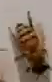

### Hive being robbed:

![041_072.png](041_072.png)

# Section 3 - Setting up the base model and additional layers

__The idea of tranfer learning:__

Step 1: A pretrained neural network is loaded without its top/output layer.

Step 2: The network is frozen for training.

Step 3: A new layer is created and is sequentially added to the frozen network.

Step 4: Only the parameters in the newly added layer are trainable.

### Load the neural network and make it non-trainable (Frozen state)

In [5]:
IMG_SHAPE = (image_size, image_size, 3)

# Load the VGG -16 model
feature_extractor = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                                include_top=False,
                                                weights='imagenet')

In [6]:
feature_extractor.trainable = False


feature_extractor.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

### Adding a new layer 

A new layer (output layer) is added in unfrozen state.

In [7]:
model = tf.keras.Sequential([
  feature_extractor,
  keras.layers.GlobalAveragePooling2D(),
  keras.layers.Dense(1, activation='softmax')
])


model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 6, 6, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 513       
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________


# Section 4 - Training

The parameters of the newly added layer are trainable.

In [8]:
# Saving the model

checkpoint_dir = './training_checkpoints'

checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_training_vgg16")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

epochs = 2
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

history = model.fit(train_generator,
                              steps_per_epoch = steps_per_epoch,
                              epochs=epochs,
                              validation_data=validation_generator,
                              validation_steps=validation_steps,
                              callbacks=[checkpoint_callback])

Epoch 1/2
220/220 [==============================] - 682s 3s/step - loss: 0.6681 - accuracy: 0.9164 - val_loss: 1.5772 - val_accuracy: 0.9048
Epoch 2/2
220/220 [==============================] - 711s 3s/step - loss: 0.4125 - accuracy: 0.9514 - val_loss: 1.8622 - val_accuracy: 0.9013


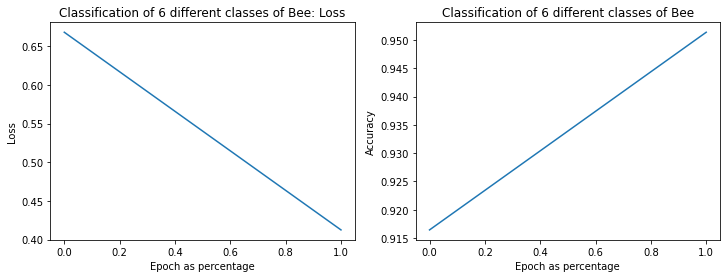

In [14]:
## Trained model analysis 
f, ax = plt.subplots(1,2, figsize=(12,4))

# Loss
ax[0].plot(history.history['loss'])
ax[0].set_title('Classification of 6 different classes of Bee: Loss')
ax[0].set_xlabel('Epoch as percentage')
ax[0].set_ylabel('Loss')



# Accuracy
ax[1].plot(history.history['accuracy'])
ax[1].set_title('Classification of 6 different classes of Bee')
ax[1].set_xlabel('Epoch as percentage')
ax[1].set_ylabel('Accuracy')

plt.show()

# Section 5 -  Test data pipeline setup and Testing

In [10]:
test_dir = os.path.join(base_dir, 'test')

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


test_generator = test_datagen.flow_from_directory(
                test_dir, 
                target_size=(image_size, image_size),
                batch_size=batch_size,
                classes = ['ant problems','few varrao, hive beetles','healthy','hive being robbed','missing queen','Varroa, Small Hive Beetles']
                
                )

Found 249 images belonging to 6 classes.


In [11]:
# Model Evaluation: Loss and Accuracy

test_res = model.predict(validation_generator, steps=None, callbacks=None, max_queue_size=10, workers=1,
                                    use_multiprocessing=False, verbose=0)
print('Evaluation: loss function: %s, accuracy:' % test_res[0], test_res[1])

Evaluation: loss function: [2.6296255e-01 8.6192484e-09 1.2843709e-01 6.0760361e-01 9.9681143e-04
 7.1262258e-09], accuracy: [2.3778030e-01 6.5080917e-06 7.5984305e-01 2.2335870e-03 1.2066645e-04
 1.5885185e-05]


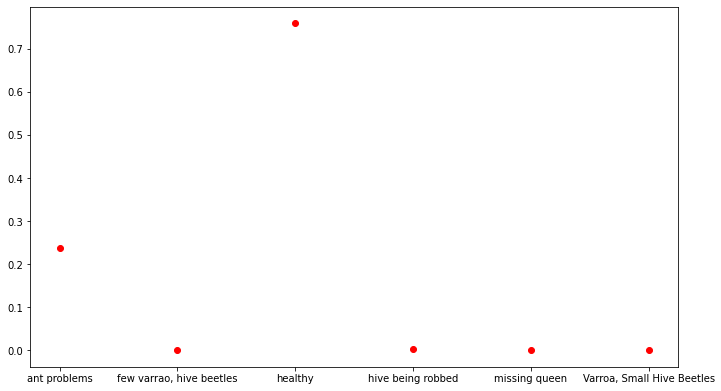

In [16]:

fig=plt.figure(figsize=(9,5))
ax=fig.add_axes([0,0,1,1])
classes = ['ant problems','few varrao, hive beetles','healthy','hive being robbed','missing queen','Varroa, Small Hive Beetles']

ax.scatter(classes, test_res[1], color='r')

# Section 6 -  Results and Discussion:


With transfer learning, a training accuracy of 95% and validation accuracy of 90% for the classification of 6 classes of bees has been achieved. But the test data accuracy is low. One reason might be that less number of parameters have been trained on multiple classes. For the class "healthy" bees, the accuracy is higher because the few available weights and other hyperparameters have been trained for this class due to high number of images in the dataset. Whereas for the remaining 5 classes, the number of images available in the dataset was less.


Thus as an outcome from this project, it can be said that transfer learning works as expected with good accuracy if we train for minimum number of classes. If training is done on many classes, then it leads to overfitting (as observed in this project: high training accuracy and low test accuracy) due to minimal number tuning parameters available. 

### Conclusion


Also if a relevant class is re-trained using transfer learning, then a even more better performance can be expected. For example: If a neural network is pre-trained on a car models of BENZ, BMW, Toyota. Such a network is chosen and using transfer learning technique it is trained on Audi cars. As old and new data are similar,  good accuracy can be expected.

# References

[Bee_data] : Yang, J. (2018, September 16). The BeeImage dataset: Annotated Honey Bee Images (Version 2) [Apis mellifera with location, date, health, and more labels]. Kaggle. https://www.kaggle.com/jenny18/honey-bee-annotated-images

[TL] : Schutera, M. & Hochschule Ravensburg Weingarten. (2021). Applied Deep Learning - Transfer Learning (ADL_03_LectureSlides) [Slides]. https://elearning.rwu.de/course/view.php?id=2345